In [1]:
import re
from io import StringIO
from pathlib import Path

import geopandas as gpd
import requests

Query the Arcgis server

In [2]:
with requests.get(
    'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/',
    params={
        'f': 'json'
    }
) as r:
    services = r.json()

In [3]:
feature_server = next((s['url'] for s in services['services'] if re.match(r'Local_Authority_Districts_.*2024.*BUC', s['name']) and s['type'] == 'FeatureServer'))

In [4]:
feature_server

'https://services1.arcgis.com/ESMARspQHYMw9BZ9/ArcGIS/rest/services/Local_Authority_Districts_May_2024_Boundaries_UK_BUC/FeatureServer'

In [5]:
import requests
with requests.get(f"{feature_server}/0/query",
                  params={
                      'where': '1=1',
                      'f': 'geojson',
                      'outFields': 'LAD24CD,LAD24NM,LAD24NMW,LAT,LONG',
                      'geometryPrecision': 5
                  }) as r:
    df = gpd.read_file(StringIO(r.text))

In [6]:
df.LAD24NMW = df.LAD24NMW.str.strip()

<Axes: >

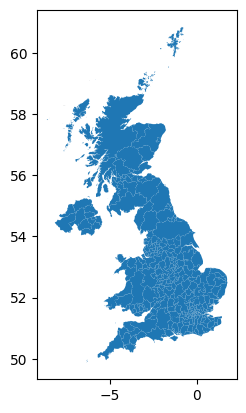

In [7]:
df.plot()

In [8]:
ROOT = Path('..')

df.set_crs(None, allow_override=True).to_file(ROOT / 'static/geojson/lad.geojson')

/media/data/code/dringtech/social-value-data-explorer/.venv/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [9]:
df.to_parquet(ROOT / 'static/autoload-data/lad.parquet')